# Youtube Sentiment Analysis

Collected data from Al-jazeera live youtube streaming (video-id = "GXfsI-zZO7s") for 80 minutes using script sraper.py. Command:

``` python scraper.py -id GXfsI-zZO7s -m 80 | tqdm > data.csv```

## Imports 

In [ ]:
import pandas
from collections import Counter
from stop_words import get_stop_words

In [194]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

## Loading the data

In [265]:
df = pandas.read_csv('data.csv')

## Data Analysis

### Top 5 chat contributors

In [266]:
top_authors = Counter(df['author']).most_common(5)
top_authors

[('Sigment', 86),
 ('emad zak', 66),
 ('whistleblower gay biological man being feminine', 41),
 ('greg william', 36),
 ('Filmi Raaj', 33)]

## Stopwords and Preprocessing function

In [267]:
stop_words = get_stop_words('en')

In [268]:
def preprocess_text(messages, stopwords=[]):
    preprocessed = []
    for message in messages:
        preprocessed.append(' '.join(x for x in message.lower().split() if  x not in stopwords and not x.startswith('@')))
    return preprocessed

## Preprocessing messages

In [200]:
preprocessed_msgs = preprocess_text(df['message'], stop_words)

## Top 10 most used words

In [269]:
Counter(' '.join(preprocessed_msgs).split()).most_common(10)

[('wow', 34),
 ('boss', 34),
 ('news', 26),
 ('school', 8),
 ('love', 6),
 ('may', 5),
 ('people', 5),
 ('hi', 4),
 ('come', 4),
 ('ok', 4)]

## WordCloud

In [270]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(' '.join(preprocessed_msgs))

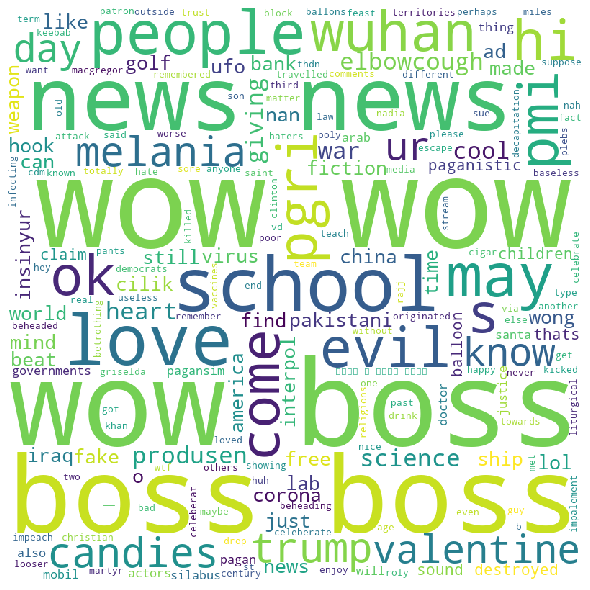

In [271]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## Unsuperived Sentiment Analysis
vaderSentiment is a library which can be used to perform sentiment analysis on Unsupervised data, the library uses lexicon and rule-based algorithm to assign each message a positive, negative and neutral score. The scores are basically a probability distribution.

In [303]:
res = []
analyzer = SentimentIntensityAnalyzer()
keys = {'neg': 'Negative',
        'pos': 'Positive',
        'neu': 'Neutral'
       }
for msg in preprocess_text(df['message']):
    if msg.strip() is None:
        continue
    vs = analyzer.polarity_scores(msg)
    results = {key: value for (key,value) in vs.items() if key in keys}
    label = Counter(results).most_common(1)[0][0]
    res.append([msg, vs['neu'], vs['neg'], vs['pos'], keys[label]])

In [290]:
result_df = pd.DataFrame(res, columns=["message", "neutral-score", "negative-score", "positive-score", "label"])

## Display and save resultant dataframe

In [306]:
result_df.to_csv('results.csv')
result_df.head()

,message,neutral-score,negative-score,positive-score,label
0,h a l o sorry but god idea is scam,0.356,0.368,0.276,Negative
1,badmans✝️,1.000,0.000,0.000,Neutral
2,yeah situation again,0.476,0.000,0.524,Positive
3,h a l o god idea is what created badness itself,0.530,0.000,0.470,Neutral
4,it would be in your best interest to be holy. ...,0.618,0.061,0.320,Neutral


## Labels Distribution

In [300]:
result_df['label'].value_counts()

Neutral     647
Positive     70
Negative     46
Name: label, dtype: int64

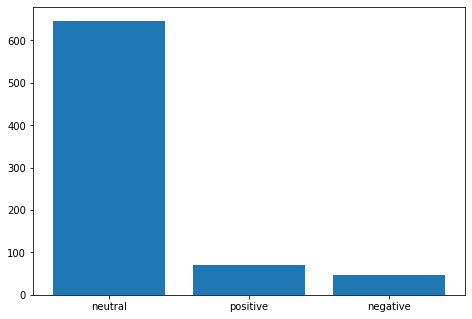

In [302]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(['neutral','positive','negative'], tuple(result_df['label'].value_counts()))
plt.show()

## Why so much Neutral?
Because its a chat data, people dont use public chats to show their sentiments towards something, the most of the messages are according to the context of general talk.

## How can we further improve?
We can improve this problem of sentiment analysis of unsupervised data through different preprocessing techniques(specifically for chat) because people usualy dont use the standard spellings or grammers in chat. And this problem totally changes when we swicth from english to some other language, Roman Urdu is another example and we need to define different preprocessing steps for it as well. 
The other thing which could be to solve this problem through some clustering mechanism. But in order to cluster the messages we need to somehow generate some numeric embeddings for each sentence, we can solve this problem through word2vec and doc2vec techniques. And finally we could move on to some deep learning techniques as well like BERT, GPT-2 etc. but we should always start with simpler solutions.